In [1]:
# data comes from ECDC: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
# alternative source for italy-only data would be this one: https://github.com/pcm-dpc/COVID-19

import pandas as pd
import datetime as dt

try: 
    # see if today's data is available:
    today = dt.datetime.today().strftime('%Y-%m-%d')
    df0 = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'+today+'.xlsx')
except:
    # otherwise get yesterday's data:
    yesterday = (dt.datetime.today() - dt.timedelta(days=1)).strftime('%Y-%m-%d')
    df0 = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'+yesterday+'.xlsx')

df0.head(5)

,dateRep,day,month,year,cases,deaths,geoId,continentExp,countryterritoryCode,popData2018,countriesAndTerritories
0,2020-04-20,20,4,2020,88,3,AF,Asia,AFG,37172386.0,Afghanistan
1,2020-04-19,19,4,2020,63,0,AF,Asia,AFG,37172386.0,Afghanistan
2,2020-04-18,18,4,2020,51,1,AF,Asia,AFG,37172386.0,Afghanistan
3,2020-04-17,17,4,2020,10,4,AF,Asia,AFG,37172386.0,Afghanistan
4,2020-04-16,16,4,2020,70,2,AF,Asia,AFG,37172386.0,Afghanistan


In [2]:
# remove duplicated values 
df0 = df0[~df0[['dateRep','countriesAndTerritories']].duplicated()]
# pivot
df = df0.pivot(index='dateRep',columns='countriesAndTerritories',values='cases')
df.fillna(0,inplace=True)
df.tail(5)

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_Republic_of_Tanzania,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
dateRep,,,,,,,,,,,,,,,,,,,,,
2020-04-16,70.0,19.0,90.0,14.0,0.0,0.0,0.0,0.0,48.0,1.0,...,35.0,0.0,30148.0,6.0,137.0,4.0,1.0,0.0,3.0,6.0
2020-04-17,10.0,24.0,108.0,9.0,0.0,0.0,0.0,128.0,42.0,2.0,...,6.0,0.0,31667.0,13.0,78.0,7.0,0.0,0.0,0.0,1.0
2020-04-18,51.0,21.0,150.0,14.0,0.0,0.0,0.0,98.0,47.0,1.0,...,53.0,0.0,30833.0,18.0,70.0,23.0,1.0,0.0,4.0,0.0
2020-04-19,63.0,9.0,117.0,8.0,5.0,0.0,0.0,170.0,43.0,0.0,...,1.0,2.0,32922.0,18.0,45.0,0.0,0.0,0.0,5.0,1.0
2020-04-20,88.0,14.0,94.0,9.0,0.0,0.0,0.0,102.0,48.0,1.0,...,22.0,0.0,24601.0,4.0,70.0,29.0,0.0,0.0,4.0,0.0


In [3]:
# select only columns with totals greater than 1000
df2 = df[df.columns[df.sum()>20000]]
df2.sum().sort_values(ascending=False)

countriesAndTerritories
United_States_of_America    759687.0
Spain                       195944.0
Italy                       178972.0
Germany                     141672.0
United_Kingdom              120067.0
France                      112606.0
Turkey                       86306.0
China                        83817.0
Iran                         82211.0
Russia                       42853.0
Brazil                       38654.0
Belgium                      38496.0
Canada                       34777.0
Netherlands                  32655.0
Switzerland                  27658.0
Portugal                     20206.0
dtype: float64

In [4]:
# reorder the columns
df2 = df2[df2.sum().sort_values(ascending=False).index]
df2.tail()

countriesAndTerritories,United_States_of_America,Spain,Italy,Germany,United_Kingdom,France,Turkey,China,Iran,Russia,Brazil,Belgium,Canada,Netherlands,Switzerland,Portugal
dateRep,,,,,,,,,,,,,,,,
2020-04-16,30148.0,5092.0,2667.0,2866.0,4603.0,2633.0,4281.0,50.0,1512.0,3388.0,3058.0,2454.0,1318.0,734.0,583.0,643.0
2020-04-17,31667.0,5183.0,3786.0,3380.0,4617.0,2641.0,4801.0,352.0,1606.0,3448.0,2105.0,1236.0,1717.0,1061.0,315.0,750.0
2020-04-18,30833.0,5252.0,3493.0,3609.0,5599.0,405.0,4353.0,31.0,1499.0,4070.0,3257.0,1329.0,1791.0,1235.0,346.0,181.0
2020-04-19,32922.0,3658.0,3491.0,2458.0,5525.0,2569.0,3783.0,18.0,1374.0,4785.0,2917.0,1045.0,1469.0,1140.0,325.0,663.0
2020-04-20,24601.0,4218.0,3047.0,1775.0,5850.0,785.0,3977.0,14.0,1343.0,6060.0,2055.0,1313.0,1436.0,1066.0,336.0,521.0


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
# calculate first and last date to show on plot:
first_date = df2.index.min() + dt.timedelta(days=14)
last_date  = df2.index.max() + dt.timedelta(days=21)
date_range = [first_date,last_date]

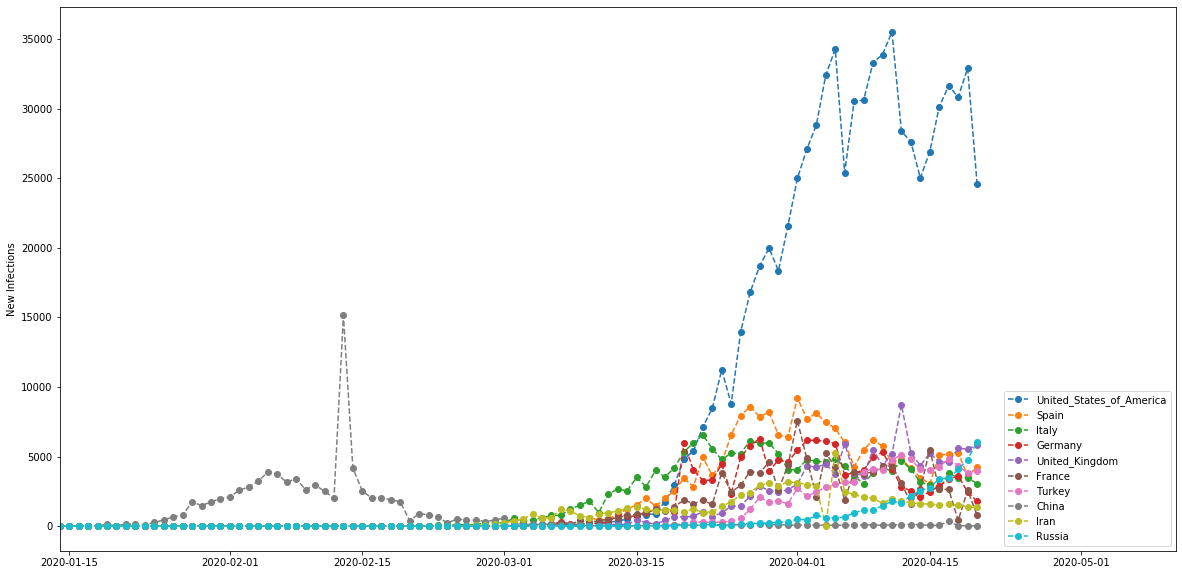

In [6]:
plt.figure(figsize=(20,10))
plt.plot(df2.iloc[:,:10],'o--')
plt.ylabel("New Infections")
plt.xlim(date_range)
plt.legend(df2.columns.values,loc=4);

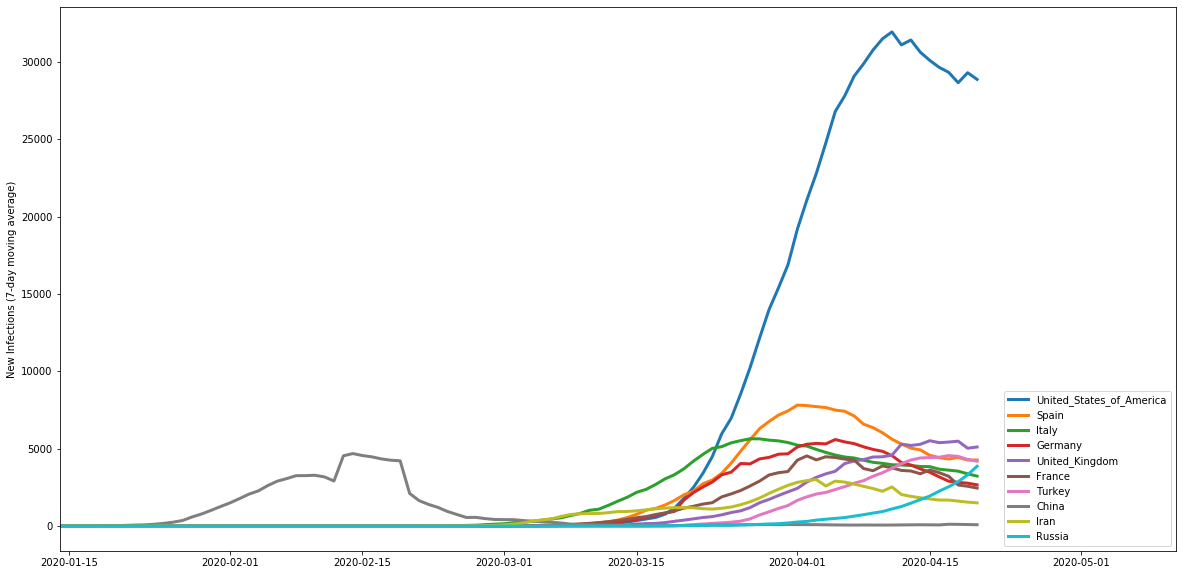

In [7]:
plt.figure(figsize=(20,10))
plt.plot(df2.iloc[:,:10].rolling(window=7).mean(),linewidth=3)
plt.ylabel("New Infections (7-day moving average)")
plt.xlim(date_range)
plt.legend(df2.columns.values,loc=4);

In [8]:
df2cum = df2.cumsum()
df2cum.tail()

countriesAndTerritories,United_States_of_America,Spain,Italy,Germany,United_Kingdom,France,Turkey,China,Iran,Russia,Brazil,Belgium,Canada,Netherlands,Switzerland,Portugal
dateRep,,,,,,,,,,,,,,,,
2020-04-16,639664.0,177633.0,165155.0,130450.0,98476.0,106206.0,69392.0,83402.0,76389.0,24490.0,28320.0,33573.0,28364.0,28153.0,26336.0,18091.0
2020-04-17,671331.0,182816.0,168941.0,133830.0,103093.0,108847.0,74193.0,83754.0,77995.0,27938.0,30425.0,34809.0,30081.0,29214.0,26651.0,18841.0
2020-04-18,702164.0,188068.0,172434.0,137439.0,108692.0,109252.0,78546.0,83785.0,79494.0,32008.0,33682.0,36138.0,31872.0,30449.0,26997.0,19022.0
2020-04-19,735086.0,191726.0,175925.0,139897.0,114217.0,111821.0,82329.0,83803.0,80868.0,36793.0,36599.0,37183.0,33341.0,31589.0,27322.0,19685.0
2020-04-20,759687.0,195944.0,178972.0,141672.0,120067.0,112606.0,86306.0,83817.0,82211.0,42853.0,38654.0,38496.0,34777.0,32655.0,27658.0,20206.0


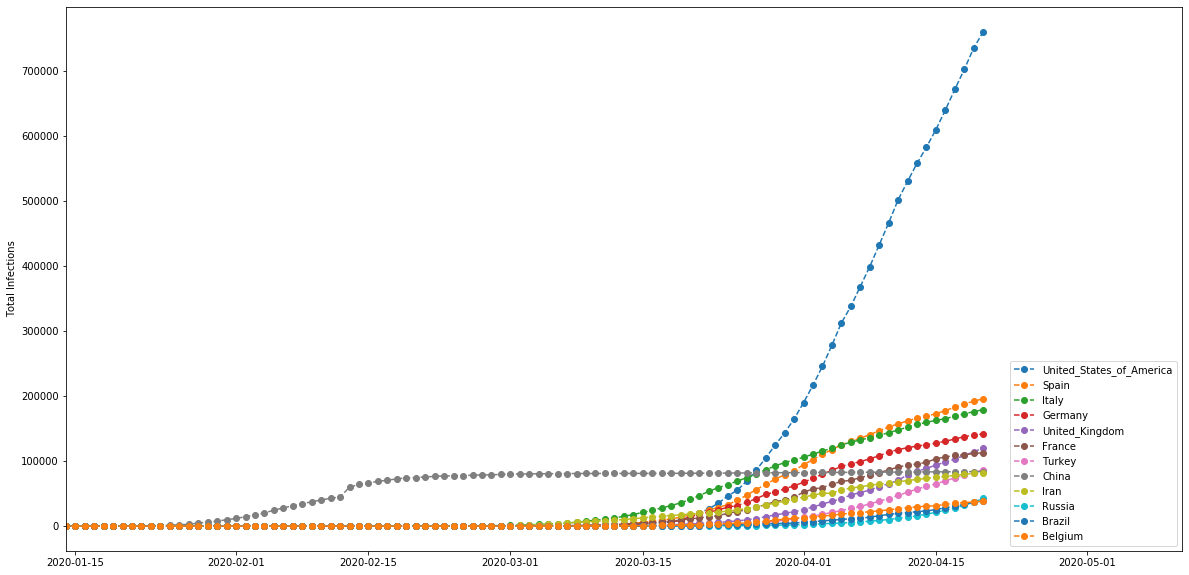

In [9]:
plt.figure(figsize=(20,10))
plt.plot(df2cum.iloc[:,:12],'o--')
plt.ylabel("Total Infections")
plt.xlim(date_range)
plt.legend(df2cum.columns.values,loc=4);

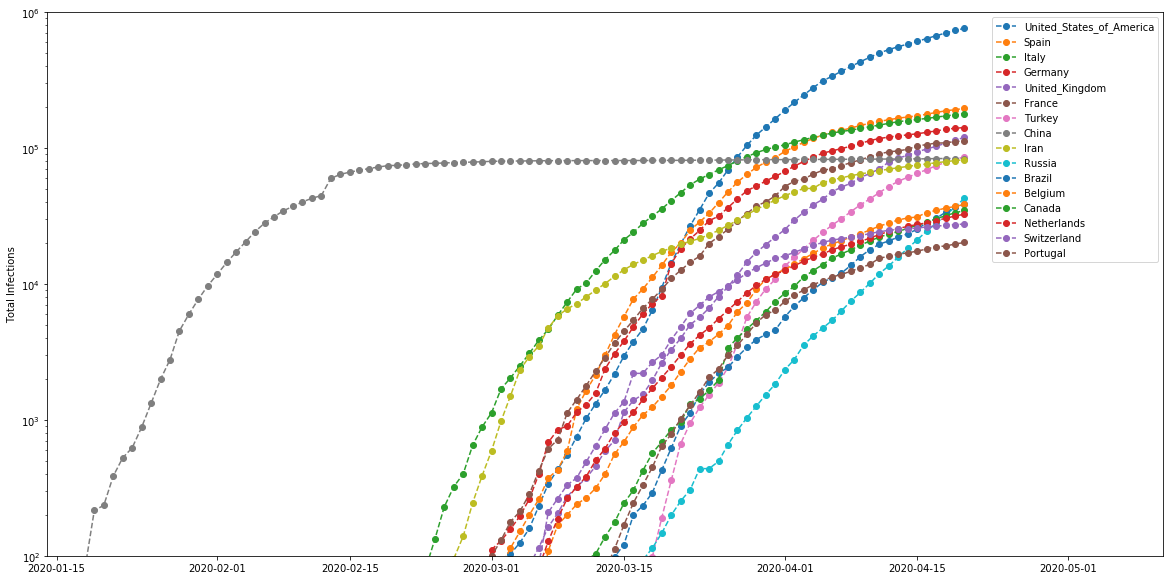

In [10]:
plt.figure(figsize=(20,10))
plt.yscale('log')
plt.ylim([100,1000000])
plt.ylabel("Total Infections")
plt.plot(df2cum.iloc[:,:32],'o--')
plt.xlim(date_range)
plt.legend(df2cum.columns.values);

In [11]:
# now look at the mortality data
df_deaths = df0.pivot(index='dateRep',columns='countriesAndTerritories',values='deaths')
df_deaths.fillna(0,inplace=True)
df_deaths = df_deaths[df_deaths.columns[df_deaths.sum()>100]]
df_deaths = df_deaths[df_deaths.sum().sort_values(ascending=False).index]
df_deaths.tail(7)

countriesAndTerritories,United_States_of_America,Italy,Spain,France,United_Kingdom,Belgium,Iran,China,Germany,Netherlands,...,Israel,Japan,Norway,Ukraine,Morocco,Argentina,Chile,Panama,Serbia,Greece
dateRep,,,,,,,,,,,,,,,,,,,,,
2020-04-14,1541.0,564.0,517.0,574.0,717.0,303.0,111.0,0.0,170.0,86.0,...,13.0,7.0,11.0,10.0,8.0,3.0,2.0,7.0,5.0,1.0
2020-04-15,2408.0,604.0,567.0,762.0,778.0,254.0,98.0,1.0,285.0,122.0,...,7.0,10.0,13.0,5.0,0.0,7.0,10.0,1.0,9.0,2.0
2020-04-16,4928.0,578.0,523.0,1438.0,761.0,283.0,94.0,0.0,315.0,189.0,...,7.0,17.0,3.0,18.0,1.0,4.0,2.0,8.0,5.0,1.0
2020-04-17,2299.0,525.0,551.0,753.0,861.0,417.0,92.0,1290.0,299.0,181.0,...,12.0,12.0,6.0,9.0,3.0,6.0,11.0,6.0,4.0,3.0
2020-04-18,3770.0,575.0,348.0,761.0,847.0,306.0,89.0,0.0,242.0,144.0,...,9.0,6.0,0.0,8.0,5.0,7.0,11.0,7.0,7.0,0.0
2020-04-19,1856.0,480.0,565.0,642.0,888.0,290.0,73.0,0.0,184.0,142.0,...,13.0,7.0,12.0,8.0,2.0,10.0,10.0,4.0,7.0,0.0
2020-04-20,1772.0,433.0,410.0,395.0,596.0,230.0,87.0,0.0,110.0,83.0,...,8.0,10.0,6.0,10.0,4.0,2.0,7.0,6.0,5.0,5.0


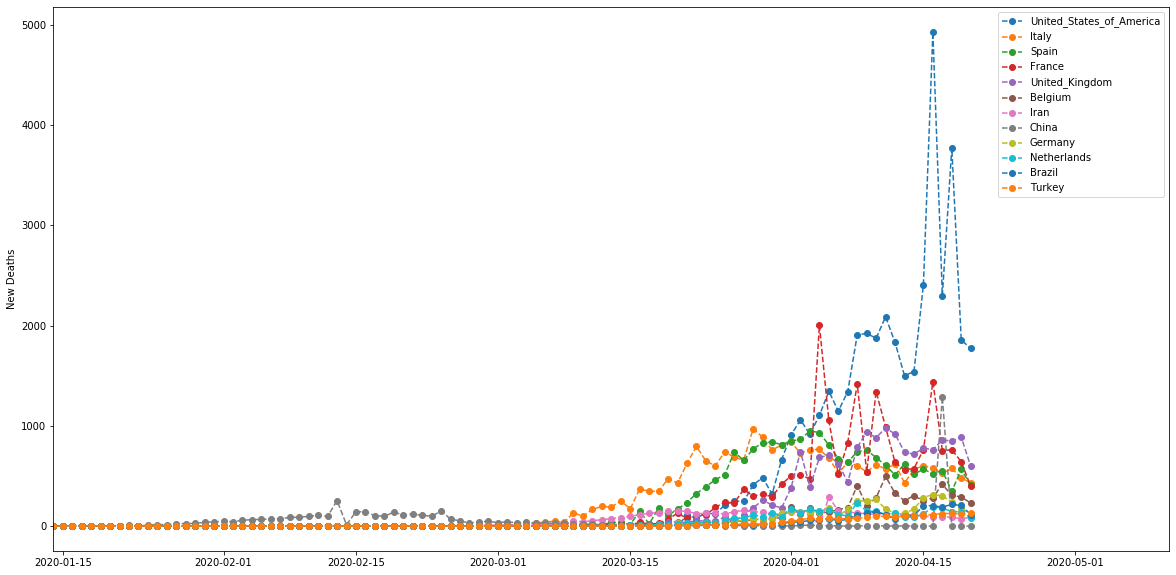

In [12]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths.iloc[:,:12],'o--')
plt.ylabel("New Deaths")
plt.xlim(date_range)
plt.legend(df_deaths.columns.values,loc=1);

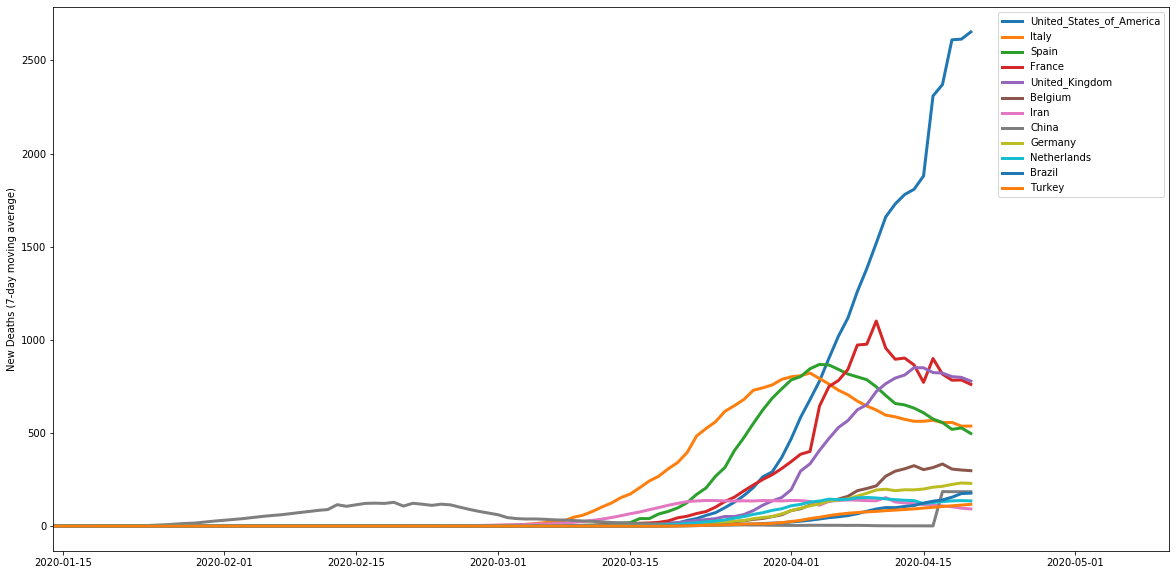

In [13]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths.iloc[:,:12].rolling(window=7).mean(),linewidth=3)
plt.ylabel("New Deaths (7-day moving average)")
plt.xlim(date_range)
plt.legend(df_deaths.columns.values,loc=1);

In [14]:
df_deaths_cum = df_deaths.cumsum()
df_deaths_cum.tail()

countriesAndTerritories,United_States_of_America,Italy,Spain,France,United_Kingdom,Belgium,Iran,China,Germany,Netherlands,...,Israel,Japan,Norway,Ukraine,Morocco,Argentina,Chile,Panama,Serbia,Greece
dateRep,,,,,,,,,,,,,,,,,,,,,
2020-04-16,30985.0,21647.0,18579.0,17167.0,12868.0,4440.0,4777.0,3346.0,3569.0,3134.0,...,130.0,136.0,130.0,116.0,127.0,109.0,94.0,103.0,99.0,102.0
2020-04-17,33284.0,22172.0,19130.0,17920.0,13729.0,4857.0,4869.0,4636.0,3868.0,3315.0,...,142.0,148.0,136.0,125.0,130.0,115.0,105.0,109.0,103.0,105.0
2020-04-18,37054.0,22747.0,19478.0,18681.0,14576.0,5163.0,4958.0,4636.0,4110.0,3459.0,...,151.0,154.0,136.0,133.0,135.0,122.0,116.0,116.0,110.0,105.0
2020-04-19,38910.0,23227.0,20043.0,19323.0,15464.0,5453.0,5031.0,4636.0,4294.0,3601.0,...,164.0,161.0,148.0,141.0,137.0,132.0,126.0,120.0,117.0,105.0
2020-04-20,40682.0,23660.0,20453.0,19718.0,16060.0,5683.0,5118.0,4636.0,4404.0,3684.0,...,172.0,171.0,154.0,151.0,141.0,134.0,133.0,126.0,122.0,110.0


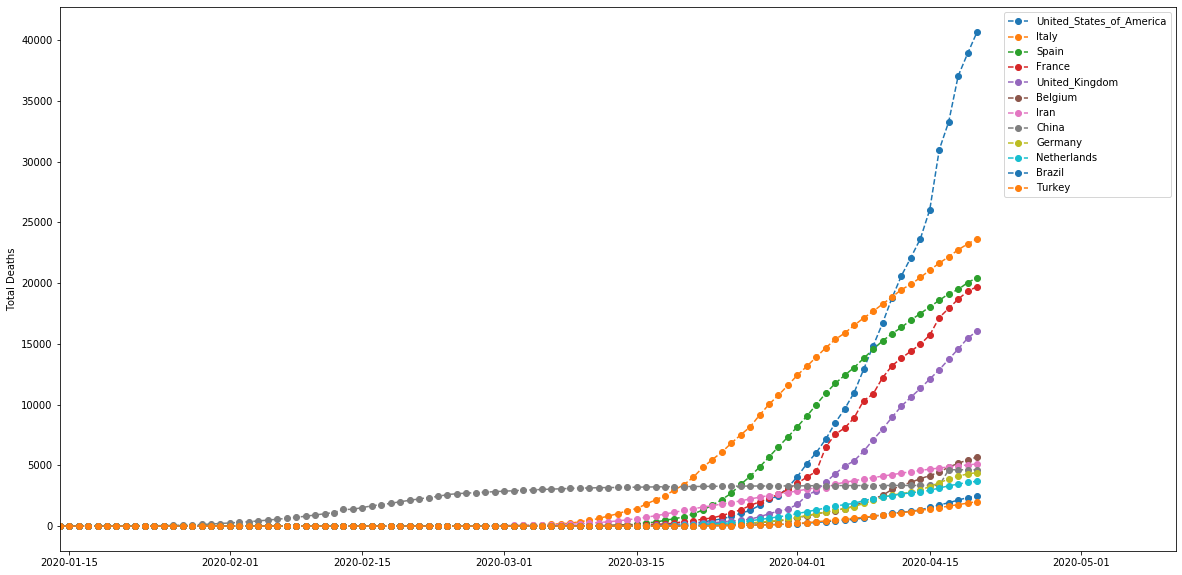

In [15]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum.iloc[:,:12],'o--')
plt.ylabel("Total Deaths")
plt.xlim(date_range)
plt.legend(df_deaths_cum.columns.values,loc=1);

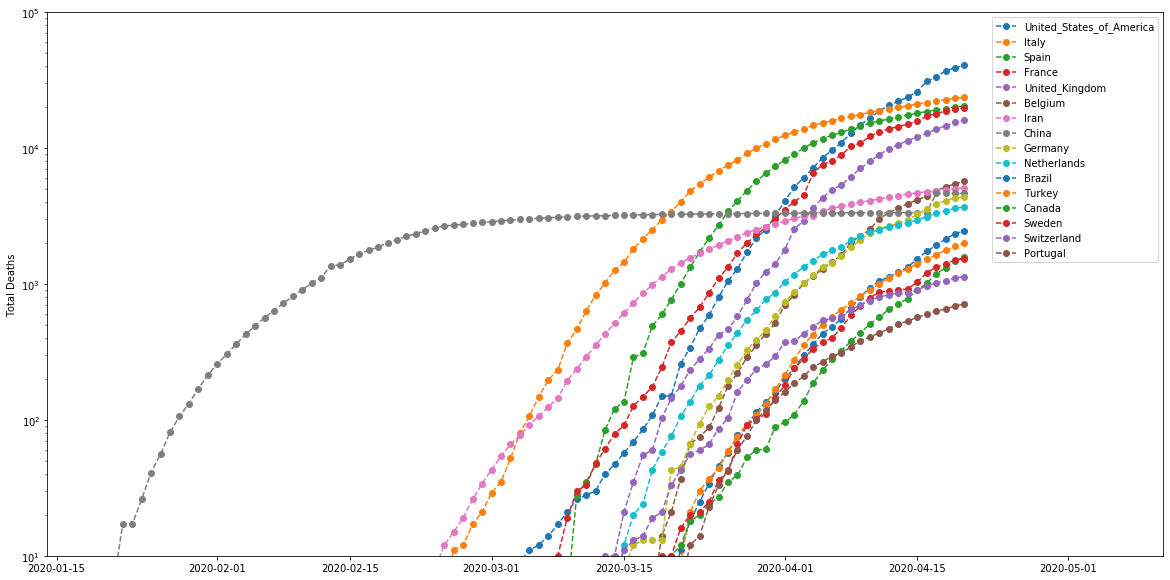

In [16]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum.iloc[:,:16],'o--')
plt.yscale('log')
plt.ylim([10,100000])
plt.ylabel("Total Deaths")
plt.xlim(date_range)
plt.legend(df_deaths_cum.columns.values, loc=1);

In [17]:
# calculate delay after China to reach 20 deaths: 
china_date = df_deaths_cum['China'].gt(19).idxmax()
df_delay = (df_deaths_cum.gt(19).idxmax() - china_date)
df_delay.sort_values(ascending=True).head()

countriesAndTerritories
China                       0 days
Iran                       35 days
Italy                      36 days
South_Korea                38 days
United_States_of_America   45 days
dtype: timedelta64[ns]

In [18]:
# shift all of the countries to the same start date: 
df_deaths_cum_shifted = df_deaths_cum.copy()
for col in list(df_deaths_cum_shifted):
    df_deaths_cum_shifted[col] = df_deaths_cum_shifted[col].shift(-df_delay[col].days)

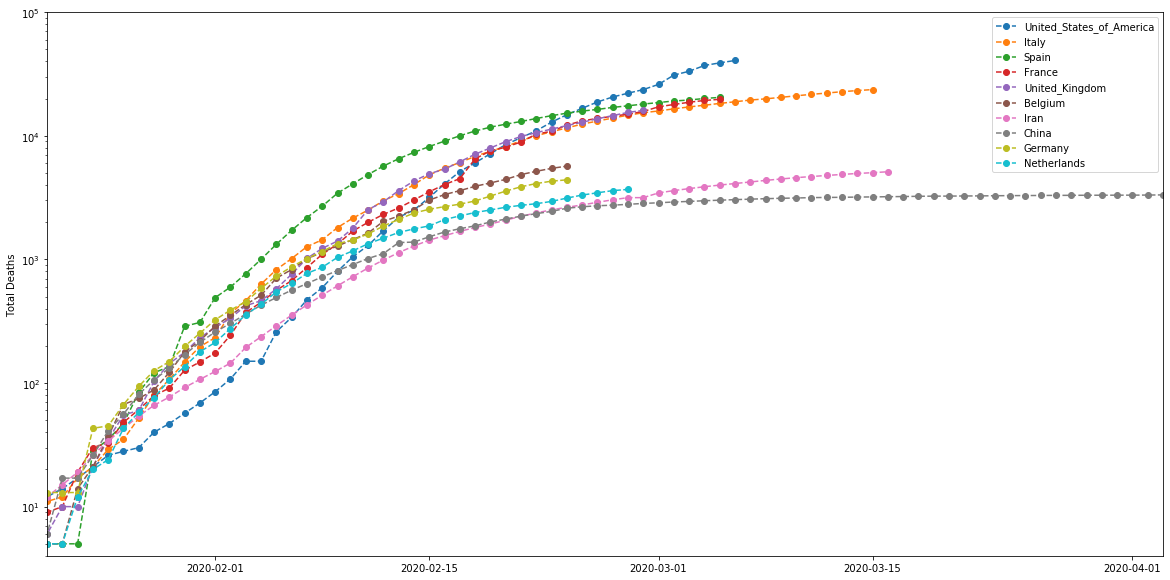

In [19]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum_shifted.iloc[:,:10],'o--')
plt.yscale('log')
plt.ylim([4,100000])
plt.ylabel("Total Deaths")
plt.xlim([china_date - dt.timedelta(days=3), china_date + dt.timedelta(days=70)])
plt.legend(df_deaths_cum.columns.values, loc=0);

In [20]:
# now let's have a look at the data for Italy to see if we can predict it going forward

import numpy as np
italy = df_deaths_cum['Italy']
italy = italy[italy > 20]
xdata = np.array(range(len(italy)))
ydata = np.array(italy,dtype=np.float128)

In [21]:
#see https://en.wikipedia.org/wiki/Generalised_logistic_function
def generalised_logistic(x, a, b, c, d, e):
     y = a / np.power(1 + b*np.exp(-c*(x+d)),1/e)
     #y = a / np.power(np.abs(1 + b*np.exp(-c*(x+d))),1/e)
     return y

# TODO: it might also be worth trying the even more general version of the equation: 
def generalised_logistic2(x, A, K, C, Q, B, M, v):
     y = A + (K - A)/ np.power(np.abs( C + Q * np.exp( -B * (x - M) )   ),1/v)
     return y

In [22]:
# now let's fit the curve
from scipy.optimize import curve_fit

# reduce the importance of older data by an exponential decay factor:
decay = .96
# TODO: would be good to set this value empirically to minimise the forecast errors up to the current time 

# restrict the range of parameter values with upper and lower bounds
bounds =([0, 0, 0, -np.inf, 0], [np.inf, np.inf, np.inf, np.inf, np.inf])

# initial parameter settings (these were set after a bit of playing around with the data)
p0=[10000, 10, .1, 0, 1]

# estimate the model:
popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=False, bounds=bounds, p0=p0, maxfev=10000)

# print the parameters along with their error estimates
np.set_printoptions(linewidth=np.inf)
np.set_printoptions(suppress=True)
print("parameter estimates: ", popt)
print("standard error:      ", np.sqrt(np.diag(pcov)))

parameter estimates:  [29614.6938832      5.81646003     0.07033937   115.81194678     0.00019922]
standard error:       [ 600.0981842   280.59296543    0.00428313 3527.86820098    0.05294211]


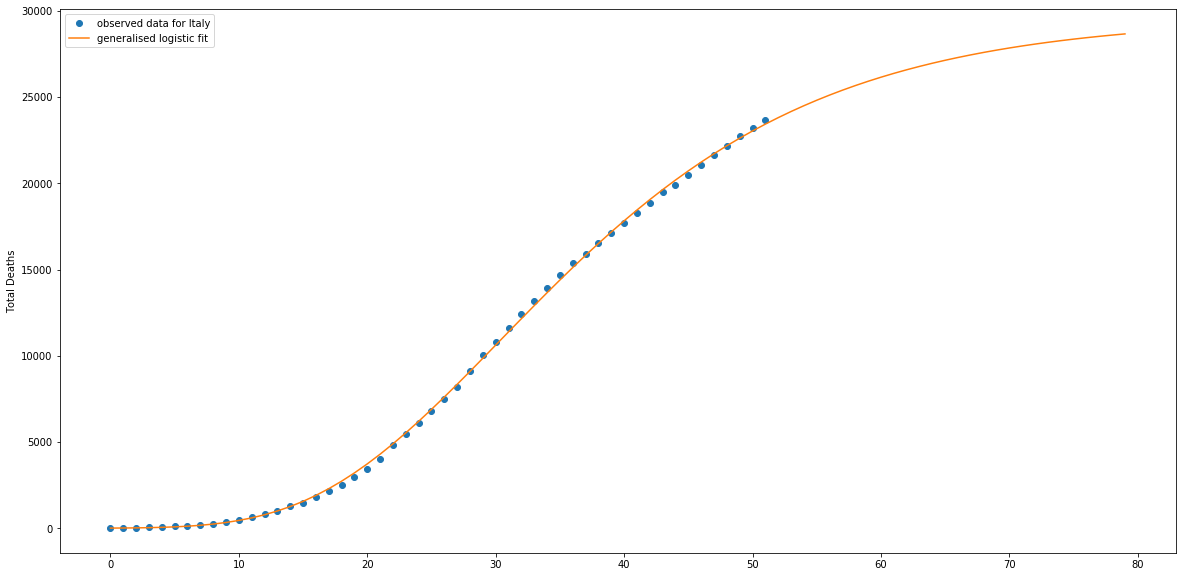

In [23]:
# plot the predictions

plt.figure(figsize=(20,10))
plt.plot(xdata, ydata, 'o', label='observed data for Italy')
xpred = range(len(ydata)+28)
ypred = generalised_logistic(xpred, *popt)
plt.plot(xpred, ypred, label='generalised logistic fit')
plt.legend(loc='best')
plt.ylabel("Total Deaths");

In [24]:
# calculate the RMSE for the fit
error = ydata - generalised_logistic(xdata, *popt)
sse = np.power(error,2).sum()
mse = sse/len(error)
rmse = np.sqrt(mse)
rmse

155.58844922187531151

In [25]:
# calculate confidence bands using the delta-method:

# 1) use sympy to find gradient of function
from sympy import symbols,exp,lambdify

x, a, b, c, d, e = symbols('x a b c d e')
y = a / (1 + b*exp(-c*(x+d)))**(1/e)
dy_da = lambdify([x,[a,b,c,d,e]],y.diff(a))
dy_db = lambdify([x,[a,b,c,d,e]],y.diff(b))
dy_dc = lambdify([x,[a,b,c,d,e]],y.diff(c))
dy_dd = lambdify([x,[a,b,c,d,e]],y.diff(d))
dy_de = lambdify([x,[a,b,c,d,e]],y.diff(e))

def gradient(x, params):
    return [dy_da(x,params),dy_db(x,params),dy_dc(x,params),dy_dd(x,params),dy_de(x,params)] 

# 2) multiply gradient by covariance to compute variance of predicted value y
def variance_in_y(x, params, cov):
    g = np.array(gradient(x,params)) 
    return g.dot(cov).dot(g)

# 3) scale by estimated standard deviation by critical value 1.96 to get 95% confidence interval
c = 1.96
intervals = [c * np.sqrt(variance_in_y(x,popt,pcov)) for x in xpred]

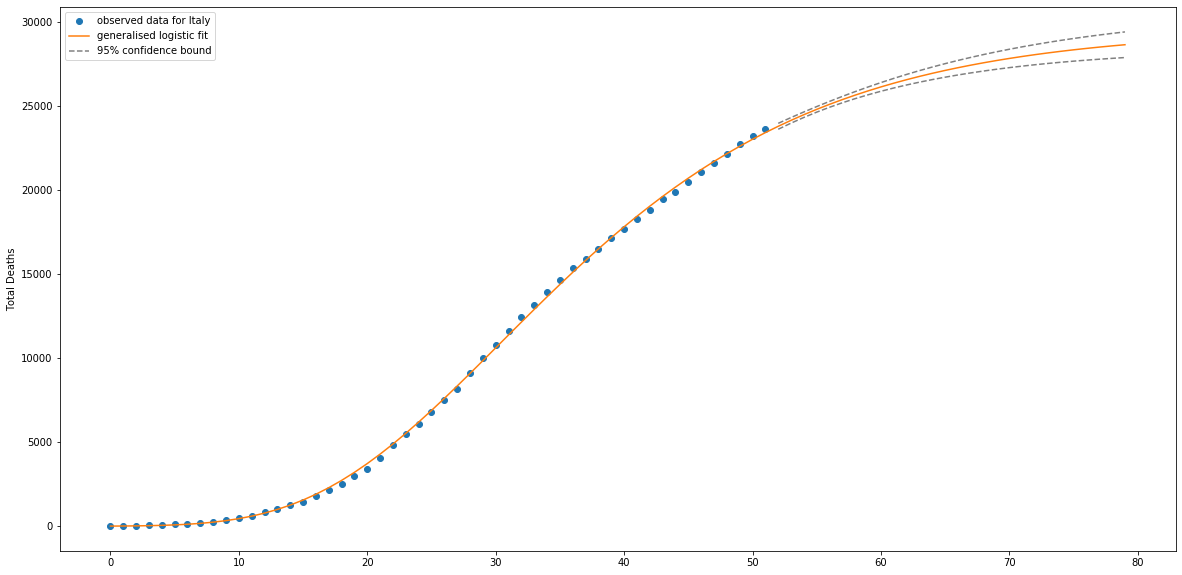

In [26]:
# plot the predictions with the confidence intervals
# NB: the interval GREATLY UNDERESTIMATES UNCERTAINTY 
# (since it assumes that the model is correct, which is most certainly isn't)

plt.figure(figsize=(20,10))
plt.plot(xdata, ydata, 'o', label='observed data for Italy')
n = len(ydata)
xpred = range(n+28)
ypred = generalised_logistic(xpred, *popt)
plt.plot(xpred, ypred, label='generalised logistic fit')
plt.plot(xpred[n:], ypred[n:]+intervals[n:], '--', color='grey', label='95% confidence bound')
plt.plot(xpred[n:], ypred[n:]-intervals[n:], '--', color='grey')
plt.legend(loc='best')
plt.ylabel("Total Deaths");

/Users/carman/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/carman/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


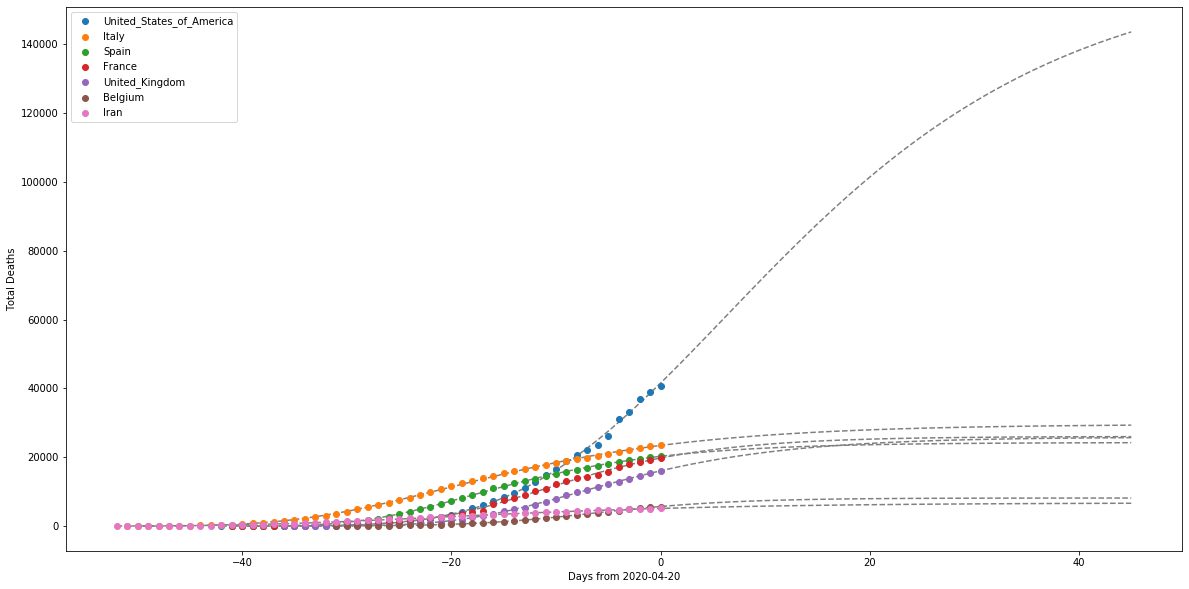

In [27]:
# plot other countries with high fatality counts

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,:7]:
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.legend(loc=0);

/Users/carman/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


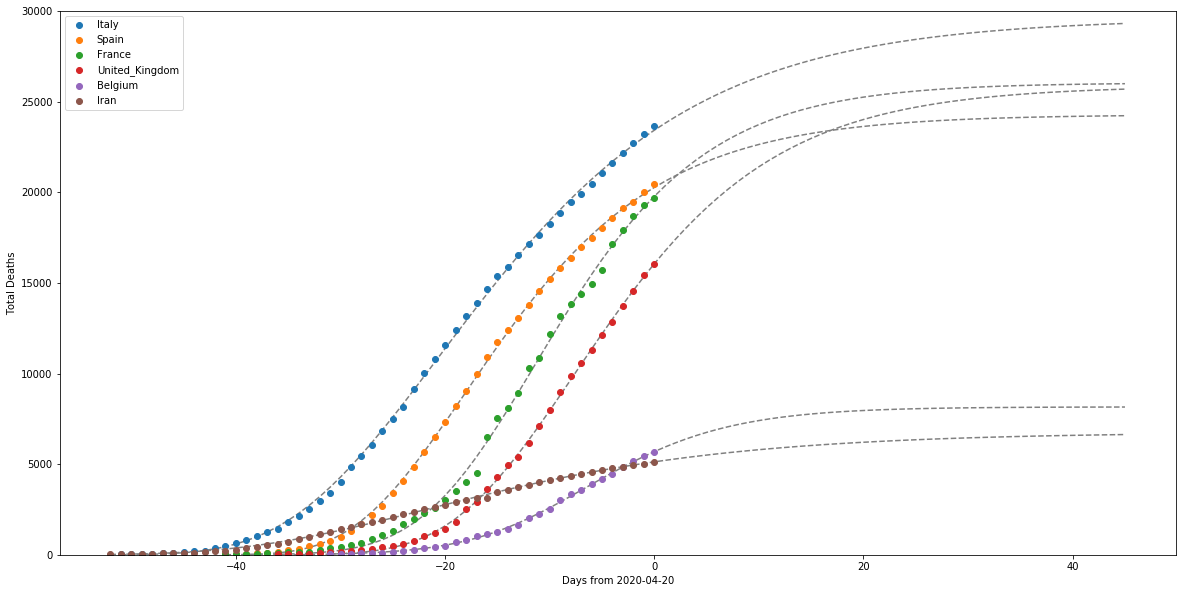

In [28]:
# zoom in the y-axis on the previous plot

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,1:7]:
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
plt.ylim([0,30000])
plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.legend(loc=0);

/Users/carman/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/carman/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


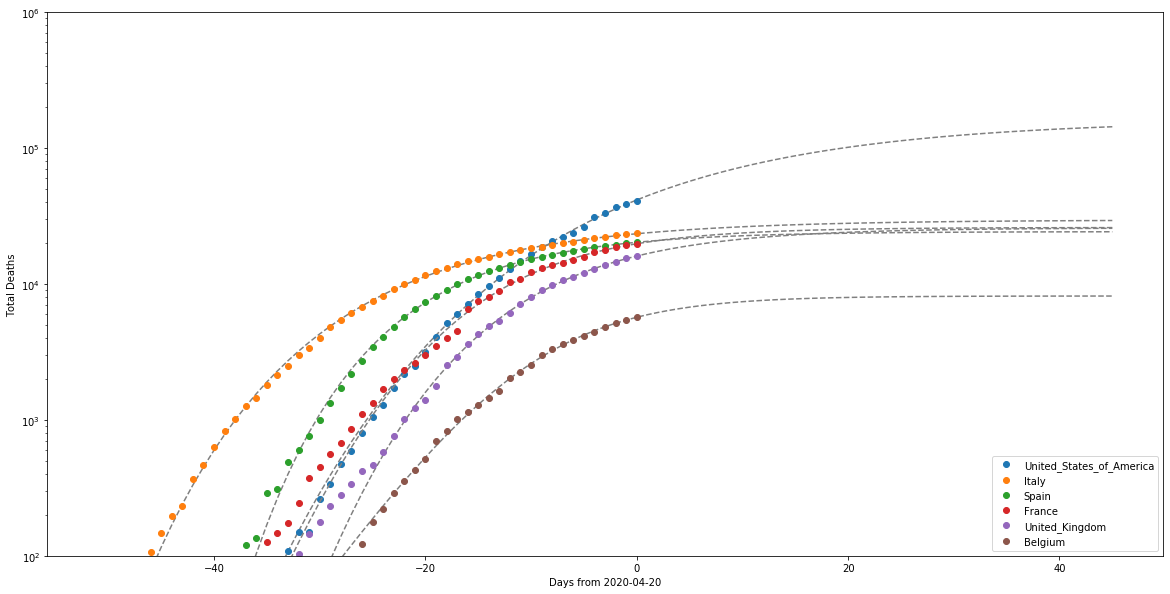

In [29]:
# log scale on the y-axis

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,:6]:
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
plt.yscale('log')
plt.ylim([100,1000000])
plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.legend(loc=4);